# Convolutional Neural Networks - CNNs

## CNN on MNIST - Part One - The Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image=X_train[0]
print(single_image.shape)
single_image

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

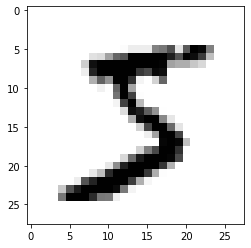

In [5]:
plt.imshow(single_image, cmap="binary") #remember - grayscale - imshow has color palette

In [6]:
y_train # value at position 0 is 5 - it's correct

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train.shape

(60000,)

In [9]:
y_example=to_categorical(y_train)

In [10]:
y_example.shape

(60000, 10)

In [11]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_cat_test=to_categorical(y_test, num_classes=10)
y_cat_train=to_categorical(y_train, num_classes=10) # to be sure that we have 10 classes

In [14]:
print(single_image.max())
print(single_image.min())

255
0


In [15]:
# clever scaling

X_train=X_train/255
X_test=X_test/255

scaled_image=X_train[0]
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
print(scaled_image.max())
print(scaled_image.min())

1.0
0.0


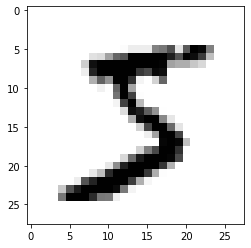

In [17]:
plt.imshow(scaled_image, cmap="binary") #it looks the sama as single_image

In [18]:
X_train.shape 

(60000, 28, 28)

In [19]:
# batch_size, width, height, color_channels
X_train=X_train.reshape(60000, 28, 28, 1) # we need one more dimension for color scale

In [20]:
X_train.shape 

(60000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28)

In [22]:
X_test=X_test.reshape(10000, 28, 28, 1)

## CNN on MNIST - Part Two - Creating and Training the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop=EarlyStopping(monitor='val_loss', patience=1)



model=Sequential()

# filters - more than classes, power of 2 - typical value
model.add(Conv2D(filters=2**5, kernel_size=(4,4), strides=(1,1), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(2**7, activation='relu'))


#output layer >> softmax > MULTI CLASS
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), 
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 573us/sample - loss: 0.1338 - accuracy: 0.9604 - val_loss: 0.0717 - val_accuracy: 0.9780
Epoch 2/10
60000/60000 [==============================] - 32s 525us/sample - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0395 - val_accuracy: 0.9865
Epoch 3/10
60000/60000 [==============================] - 33s 547us/sample - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0396 - val_accuracy: 0.9864


## CNN on MNIST - Part Three - Model Evaluation

In [25]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.133837,0.960450,0.071703,0.9780
1,0.046155,0.986017,0.039532,0.9865
2,0.030607,0.990383,0.039623,0.9864


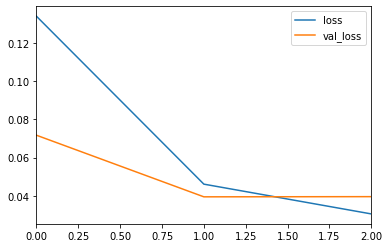

In [26]:
metrics[['loss', 'val_loss']].plot()

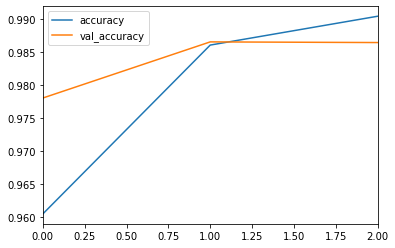

In [27]:
metrics[['accuracy', 'val_accuracy']].plot()

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.03962261054320843, 0.9864]

In [30]:
predictions=model.predict_classes(X_test)
predictions.shape

(10000,)

In [31]:

from sklearn.metrics import classification_report, confusion_matrix

#why the prediction came out as number 0 to 9 while we feed the model with training set where the labels were one-hot-encoded
#because its returning the index position of the one hot encoding
print(classification_report(y_test, predictions)) 
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 973    1    0    1    0    0    4    0    1    0]
 [   0 1133    0    0    0    1    0    0    1    0]
 [   3    3 1018    1    0    0    2    4    1    0]
 [   0    0    0  998    0    7    0    2    3    0]
 [   0    1    0    0  962   

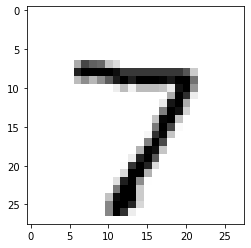

In [33]:
my_number=X_test[0]

plt.imshow(my_number.reshape(28,28), cmap='binary')

In [34]:
# num_images, width, height, color_channels

model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)

## CNN on CIFAR-10 - Part One - The Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) =cifar10.load_data()

170500096/170498071 [==============================] - 233s 1us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0].shape

(32, 32, 3)

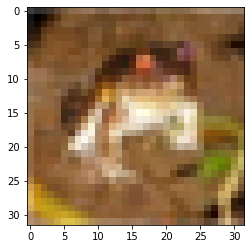

In [8]:
plt.imshow(X_train[0])

In [9]:
X_train[0].max()

255

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

y_cat_train=to_categorical(y_train, 10)
y_cat_test=to_categorical(y_test, 10)

In [14]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test[1]

array([8], dtype=uint8)

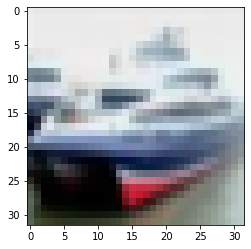

In [18]:
plt.imshow(X_test[1])

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop=EarlyStopping(monitor='val_loss', patience=2)

model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.4990 - accuracy: 0.4583 - val_loss: 1.3140 - val_accuracy: 0.5294
Epoch 2/15
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.1666 - accuracy: 0.5868 - val_loss: 1.1342 - val_accuracy: 0.5979
Epoch 3/15
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.0065 - accuracy: 0.6504 - val_loss: 1.0436 - val_accuracy: 0.6378
Epoch 4/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.8944 - accuracy: 0.6862 - val_loss: 0.9981 - val_accuracy: 0.6542
Epoch 5/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.8105 - accuracy: 0.7177 - val_loss: 0.9724 - val_accuracy: 0.6658
Epoch 6/15
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.7346 - accuracy: 0.7434 - val_loss: 0.9469 - val_accuracy: 0.6755
Epoch 7/15
50000/50000 [==============================] 

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

## CNN on CIFAR-10 - Part Two - Evaluating the Model

In [27]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.498957,0.45828,1.314026,0.5294
1,1.166602,0.58678,1.134177,0.5979
2,1.006489,0.65044,1.043623,0.6378
3,0.894351,0.68616,0.998074,0.6542
4,0.810494,0.71770,0.972413,0.6658
5,0.734606,0.74336,0.946887,0.6755
6,0.661720,0.76942,0.942017,0.6837
7,0.601007,0.78844,0.945083,0.6934
8,0.539755,0.81122,0.979448,0.6830


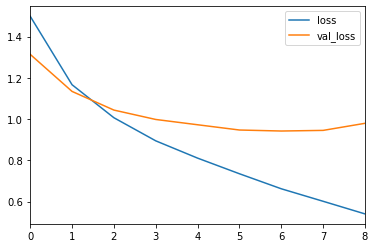

In [28]:
metrics[['loss', 'val_loss']].plot()

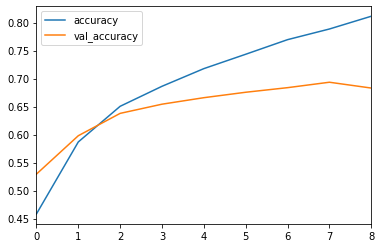

In [29]:
metrics[['accuracy', 'val_accuracy']].plot()

In [31]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.9794477294921875, 0.683]

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
predictions=model.predict_classes(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[758  18  66  20  15   4  12   5  68  34]
 [ 36 778  19   9   3   3  10   2  49  91]
 [ 58   8 592  98  65  61  63  28  19   8]
 [ 24  10  82 567  52 127  62  29  21  26]
 [ 19   8  93  90 595  46  51  71  19   8]
 [ 23   4  81 240  36 502  28  51  17  18]
 [  5  14  55  77  31  22 775   9   6   6]
 [ 34   4  34  68  42  60  12 705  10  31]
 [ 79  29  10  29   7   5   5   4 803  29]
 [ 46  79  17  24   1   5   4  16  53 755]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.82      0.78      0.80      1000
           2       0.56      0.59      0.58      1000
           3       0.46      0.57      0.51      1000
           4       0.70      0.59      0.64      1000
           5       0.60      0.50      0.55      1000
           6       0.76      0.78      0.77      1000
           7       0.77      0.70      0.73      1000
           8       0.75      0.80      0.78      1000
           9       0.75     

Only 46% precision on class 3 (cats)

(10.0, 0.0)

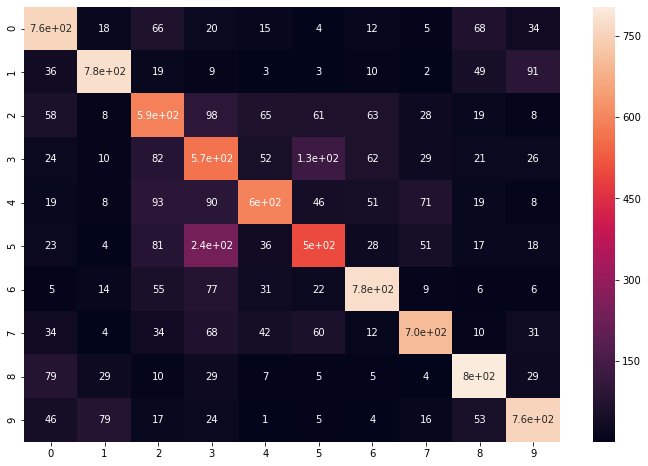

In [39]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax=sns.heatmap(confusion_matrix(y_test, predictions), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Problem - cat vs. dog

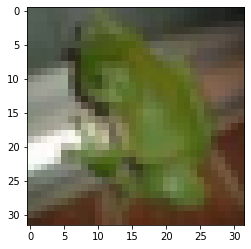

In [43]:
my_image=X_test[7]
plt.imshow(my_image)

In [44]:
y_test[7] # 6 is frog

array([6], dtype=uint8)

In [45]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([6], dtype=int64)

## Downloading Data Set for Real Image Lectures

In [46]:
import os

In [47]:
data_dir='C:\\Users\\User\\OneDrive - Politechnika Śląska\\Pulpit\\Python\\Tensorflow 2 and Keras Deep Learning\\@Source\\DATA\\cell_images'

In [48]:
os.listdir(data_dir)

['test', 'train']

## CNN on Real Image Files - Part One - Reading in the Data

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.image import imread

In [53]:
test_path=data_dir+'\\test\\'
train_path=data_dir+'\\train\\'

In [54]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [55]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [58]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [59]:
para_cell=train_path+'parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

imread(para_cell) #imread automatically convert png to the matrix

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

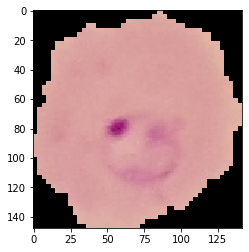

In [60]:
plt.imshow(imread(para_cell))

In [61]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

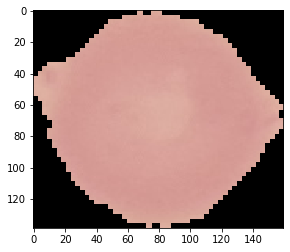

In [62]:
uninfected_cell=train_path+'uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'
plt.imshow(imread(uninfected_cell))

In [64]:
print('train:')

print(len(os.listdir(train_path+'parasitized')))
print(len(os.listdir(train_path+'uninfected')))

print('\ntest:')

print(len(os.listdir(test_path+'parasitized')))
print(len(os.listdir(test_path+'uninfected')))

train:
12480
12480

test:
1300
1300


In [66]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected'):
    img=imread(test_path+'uninfected\\'+image_filename)
    d1, d2, colors =img.shape
    dim1.append(d1)
    dim2.append(d2)

In [67]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


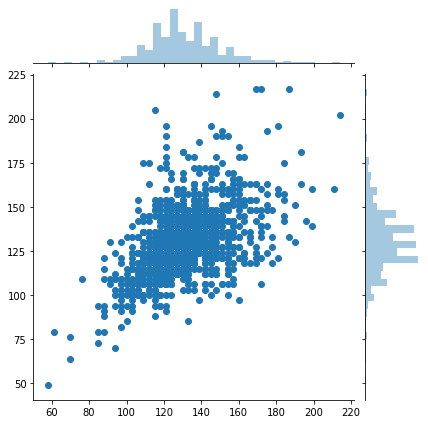

In [68]:
sns.jointplot(dim1, dim2)

In [69]:
np.mean(dim1)

130.92538461538462

In [70]:
np.mean(dim2)

130.75

In [71]:
image_shape=(130,130,3)

## CNN on Real Image Files - Part Two - Data Processing

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [74]:
imread(para_cell).max() #it's arleady scaled/normalized

0.9098039

In [75]:
image_gen=ImageDataGenerator(rotation_range=20, 
                            width_shift_range=0.1,
                            height_shift_range=0.1, 
                            rescale=1/1, #but it's arleady scaled
                            shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

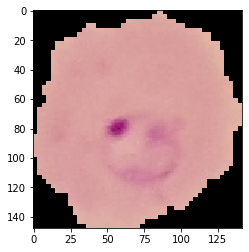

In [80]:
para_img=imread(para_cell)
plt.imshow(para_img)

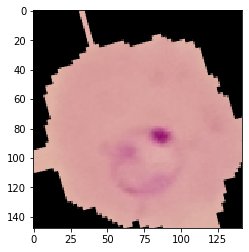

In [83]:
plt.imshow(image_gen.random_transform(para_img))

In [84]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [85]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## CNN on Real Image Files - Part Three - Creating the Model

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [88]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [90]:
image_shape

(130, 130, 3)

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='val_loss', patience=2)

batch_size=2**4

train_image_gen=image_gen.flow_from_directory(train_path, 
                                              target_size=image_shape[:2], 
                                              color_mode='rgb', 
                                              batch_size=batch_size, 
                                              class_mode='binary')

test_image_gen=image_gen.flow_from_directory(test_path, 
                                              target_size=image_shape[:2], 
                                              color_mode='rgb', 
                                              batch_size=batch_size, 
                                              class_mode='binary', 
                                            shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [92]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [93]:
results=model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20
  61/1560 [>.............................] - ETA: 16:45 - loss: 7.7801 - accuracy: 0.4938

KeyboardInterrupt: 

In [94]:
# The model is delivered in the @Source

In [95]:
from tensorflow.keras.models import load_model

model=load_model('@Source\\04-CNNs\\malaria_detector.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [96]:
# if you load model the history isnt avaliable

In [97]:
model.evaluate_generator(test_image_gen)

[1.976811575011973, 0.8696154]

## CNN on Real Image Files - Part Four - Evaluating the Model

In [98]:
pred=model.predict_generator(test_image_gen)

In [103]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [99]:
pred # type float!! only probability

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [112]:
predictions=pred>0.8 #if 80% sure that it infrcted - it is infected
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(test_image_gen.classes, predictions))
print(confusion_matrix(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.98      0.75      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600

[[1278   22]
 [ 322  978]]


In [114]:
para_cell

'C:\\Users\\User\\OneDrive - Politechnika Śląska\\Pulpit\\Python\\Tensorflow 2 and Keras Deep Learning\\@Source\\DATA\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

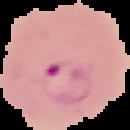

In [117]:
from tensorflow.keras.preprocessing import image


my_image=image.load_img(para_cell, target_size=image_shape)
my_image

In [116]:
type(image.load_img(para_cell))

PIL.PngImagePlugin.PngImageFile

In [120]:
my_img_arr=image.img_to_array(my_image)
my_img_arr.shape # we want (1,130,130,3)

(130, 130, 3)

In [122]:
my_img_arr=np.expand_dims(my_img_arr, axis=0) #reshape

In [123]:
model.predict(my_img_arr)

array([[0.]], dtype=float32)